In [20]:
import numpy as np 
import pandas as pd 
import yfinance as yf

import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import Ridge,Lasso

import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [21]:
df_Macro_Factors = pd.read_excel(r'./data/ETFs Sector Rotation Macro Factor df.xlsx',index_col='DATE')
df_Macro_Factors = df_Macro_Factors[['CPI YoY','Core CPI YoY','10-2 Year Treasury Yield Spread','Mkt-RF','SMB','HML']]
df_Macro_Factors

,CPI YoY,Core CPI YoY,10-2 Year Treasury Yield Spread,Mkt-RF,SMB,HML
DATE,,,,,,
2000-01-01,2.79296,2.10706,0.235,-4.74,5.79,-1.91
2000-02-01,3.21797,2.16401,-0.070,2.45,21.42,-9.70
2000-03-01,3.76214,2.44735,-0.260,5.20,-17.23,8.17
2000-04-01,3.01386,2.26886,-0.390,-6.40,-6.68,7.26
2000-05-01,3.13253,2.37960,-0.370,-4.42,-6.09,4.81
...,...,...,...,...,...,...
2022-04-01,8.22414,6.13369,0.280,-9.46,-1.41,6.19
2022-05-01,8.51641,6.01128,0.270,-0.34,-1.85,8.41
2022-06-01,8.99522,5.91245,0.070,-8.43,2.09,-5.97


- ETFs Price Data

In [22]:
dict = {
    'XLB' : 'Material',
    'XLE' : 'Energy',
    'XLF' : 'Financial',
    'XLI' : 'Industrial',
    'XLK' : 'Technology',
    'XLP' : 'Consumer Staples',
    'XLU' : 'Utility',
    'XLV' : 'Health Care',
    'XLY' : 'Consumer Discretionary',
}

dict

{'XLB': 'Material',
 'XLE': 'Energy',
 'XLF': 'Financial',
 'XLI': 'Industrial',
 'XLK': 'Technology',
 'XLP': 'Consumer Staples',
 'XLU': 'Utility',
 'XLV': 'Health Care',
 'XLY': 'Consumer Discretionary'}

In [23]:
df_etf_price = pd.read_excel(r'./data/ETFs Daily Price df.xlsx',index_col='DATE')
df_etf_price

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
DATE,,,,,,,,,
2000-01-01,13.922743,15.406697,11.868655,17.975063,38.608086,13.613623,12.359402,21.526585,20.757641
2000-02-01,12.523933,14.754468,10.598163,16.983339,42.664566,12.020637,10.857274,20.119024,19.601120
2000-03-01,13.754876,16.534883,12.487820,19.307693,46.243813,12.432620,11.954177,21.928740,22.331448
2000-04-01,13.329492,16.342661,12.654705,19.627031,41.996437,13.133813,12.831629,21.671804,21.909103
2000-05-01,12.908855,18.261688,12.937169,19.544205,37.629765,14.070637,12.803472,21.090918,20.726446
...,...,...,...,...,...,...,...,...,...
2022-05-01,84.958115,85.302902,35.097301,93.836861,139.740952,73.437263,73.243813,131.151352,153.861313
2022-06-01,72.682983,69.954254,31.119539,86.543945,126.478241,71.179016,69.105179,127.193901,136.876221
2022-07-01,77.690582,77.574211,33.533596,95.184372,143.864792,74.008575,73.452499,131.874344,162.489792


In [24]:
df_etf_return = df_etf_price.pct_change().dropna()
df_etf_return

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
DATE,,,,,,,,,
2000-02-01,-0.100469,-0.042334,-0.107046,-0.055172,0.105068,-0.117014,-0.121537,-0.065387,-0.055715
2000-03-01,0.098287,0.120670,0.178300,0.136861,0.083893,0.034273,0.101029,0.089950,0.139294
2000-04-01,-0.030926,-0.011625,0.013364,0.016539,-0.091847,0.056399,0.073401,-0.011717,-0.018913
2000-05-01,-0.031557,0.117424,0.022321,-0.004220,-0.103977,0.071329,-0.002194,-0.026804,-0.053980
2000-06-01,-0.089790,-0.059564,-0.051778,-0.041313,0.099556,0.054177,-0.041232,0.002118,-0.055907
...,...,...,...,...,...,...,...,...,...
2022-05-01,0.011761,0.160346,0.027818,-0.004625,-0.006859,-0.040829,0.043082,0.014890,-0.051203
2022-06-01,-0.144485,-0.179931,-0.113335,-0.077719,-0.094909,-0.030751,-0.056505,-0.030175,-0.110392
2022-07-01,0.068896,0.108928,0.077574,0.099839,0.137467,0.039753,0.062909,0.036798,0.187129


In [25]:
Regression_df = pd.merge(df_etf_return,df_Macro_Factors,left_index=True, right_index=True).dropna()
Regression_df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,CPI YoY,Core CPI YoY,10-2 Year Treasury Yield Spread,Mkt-RF,SMB,HML
DATE,,,,,,,,,,,,,,,
2000-02-01,-0.100469,-0.042334,-0.107046,-0.055172,0.105068,-0.117014,-0.121537,-0.065387,-0.055715,3.21797,2.16401,-0.07,2.45,21.42,-9.70
2000-03-01,0.098287,0.120670,0.178300,0.136861,0.083893,0.034273,0.101029,0.089950,0.139294,3.76214,2.44735,-0.26,5.20,-17.23,8.17
2000-04-01,-0.030926,-0.011625,0.013364,0.016539,-0.091847,0.056399,0.073401,-0.011717,-0.018913,3.01386,2.26886,-0.39,-6.40,-6.68,7.26
2000-05-01,-0.031557,0.117424,0.022321,-0.004220,-0.103977,0.071329,-0.002194,-0.026804,-0.053980,3.13253,2.37960,-0.37,-4.42,-6.09,4.81
2000-06-01,-0.089790,-0.059564,-0.051778,-0.041313,0.099556,0.054177,-0.041232,0.002118,-0.055907,3.73494,2.54813,-0.39,4.64,12.85,-8.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-0.031762,-0.007472,-0.095902,-0.073058,-0.108530,0.027700,-0.036581,-0.045942,-0.118215,8.22414,6.13369,0.28,-9.46,-1.41,6.19
2022-05-01,0.011761,0.160346,0.027818,-0.004625,-0.006859,-0.040829,0.043082,0.014890,-0.051203,8.51641,6.01128,0.27,-0.34,-1.85,8.41
2022-06-01,-0.144485,-0.179931,-0.113335,-0.077719,-0.094909,-0.030751,-0.056505,-0.030175,-0.110392,8.99522,5.91245,0.07,-8.43,2.09,-5.97


In [26]:
def Ridge_Regression_Parameters(x,y):
    regr = Ridge(alpha=1.0)
    regr.fit(x,y)
    return regr.coef_ 

def Lasso_Regression_Parameters(x,y):
    regr = Lasso(alpha=0.1)
    regr.fit(x,y)
    return regr.coef_ 

def Linear_Regreesion_Parameters(x,y):
    model = sm.OLS(y,x)
    res = model.fit()
    return res.params

def Prediction_y(x,theta_head):
    return x @ theta_head

def Compute_Alpha(y,x,theta_head):

    theta_head = theta_head[1:]
    x = x[:,1:]

    mean_y = np.mean(y)
    mean_y_pred = np.mean(x,axis=0) @ theta_head
    alpha = mean_y - mean_y_pred

    return alpha

def Alpha_Calculation(Regression_df,Target_Y,Factor, Construct_Parameter_Method):
    """
    """ 
    y = Regression_df[Target_Y].values
    x = Regression_df[Factor].values
    x = sm.add_constant(x)

    theta_head = Construct_Parameter_Method(x,y)
    return Compute_Alpha(y,x,theta_head)


- Computing Alpha Example:

In [27]:
Target_Y = 'XLB'
Factor = df_Macro_Factors.columns 
Method = Linear_Regreesion_Parameters

Alpha_Calculation(Regression_df,Target_Y,Factor, Method)

0.0027450462655081278

- Rolling regression_df and train the alpha in 3 year period

In [37]:

df_all_alpha = pd.DataFrame()

for regression_df in Regression_df.rolling(window=60):

    if regression_df.shape[0] >= 60:
        alpha_list = []
        index_start = regression_df.index[0]
        index_end = regression_df.index[-1]

        # print("---")
        # print(index_start)
        # print(index_end)
        
        for target_y in df_etf_price.columns.to_list():
            alpha = Alpha_Calculation(Regression_df = regression_df ,Target_Y = target_y, Factor = df_Macro_Factors.columns , Construct_Parameter_Method = Linear_Regreesion_Parameters )
            alpha_list.append(alpha)

        df_alpha = pd.DataFrame(alpha_list,index=df_etf_price.columns.to_list(),columns=[index_end]).T
        

        df_all_alpha = pd.concat([df_all_alpha,df_alpha],axis=0)

df_all_alpha

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
2005-01-01,-0.073996,0.101340,0.036921,0.011808,-0.036127,0.040553,0.015521,-0.024738,-0.080754
2005-02-01,-0.066402,0.115134,0.049870,0.014486,-0.044204,0.071369,0.032812,-0.006825,-0.081125
2005-03-01,-0.066486,0.115835,0.051401,0.014447,-0.044030,0.070616,0.032277,-0.006473,-0.080089
2005-04-01,-0.071200,0.126093,0.048574,-0.006031,-0.072886,0.058060,0.015554,-0.011535,-0.100672
2005-05-01,-0.079630,0.072397,0.038917,-0.013034,-0.071268,0.037046,0.022384,-0.012782,-0.087586
...,...,...,...,...,...,...,...,...,...
2022-04-01,-0.004176,-0.043445,0.009646,0.008384,-0.000317,0.002730,0.008430,-0.007906,0.012612
2022-05-01,-0.005196,-0.040089,0.009306,0.005629,0.001019,-0.004735,0.009334,-0.007238,0.008191
2022-06-01,-0.009302,-0.046033,0.013792,0.010365,-0.001640,0.001217,0.006339,-0.006631,0.005609
2022-07-01,-0.009148,-0.048135,0.014688,0.010323,-0.000057,0.000157,0.006365,-0.010794,0.010787


In [38]:
df_all_alpha = df_all_alpha.reset_index()
df_all_alpha.columns = ['DATE','XLB','XLE','XLF','XLI','XLK','XLP','XLU','XLV','XLY']

df_all_alpha.index = df_all_alpha.DATE 
df_all_alpha = df_all_alpha.drop(['DATE'],axis=1)
df_all_alpha

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
DATE,,,,,,,,,
2005-01-01,-0.073996,0.101340,0.036921,0.011808,-0.036127,0.040553,0.015521,-0.024738,-0.080754
2005-02-01,-0.066402,0.115134,0.049870,0.014486,-0.044204,0.071369,0.032812,-0.006825,-0.081125
2005-03-01,-0.066486,0.115835,0.051401,0.014447,-0.044030,0.070616,0.032277,-0.006473,-0.080089
2005-04-01,-0.071200,0.126093,0.048574,-0.006031,-0.072886,0.058060,0.015554,-0.011535,-0.100672
2005-05-01,-0.079630,0.072397,0.038917,-0.013034,-0.071268,0.037046,0.022384,-0.012782,-0.087586
...,...,...,...,...,...,...,...,...,...
2022-04-01,-0.004176,-0.043445,0.009646,0.008384,-0.000317,0.002730,0.008430,-0.007906,0.012612
2022-05-01,-0.005196,-0.040089,0.009306,0.005629,0.001019,-0.004735,0.009334,-0.007238,0.008191
2022-06-01,-0.009302,-0.046033,0.013792,0.010365,-0.001640,0.001217,0.006339,-0.006631,0.005609


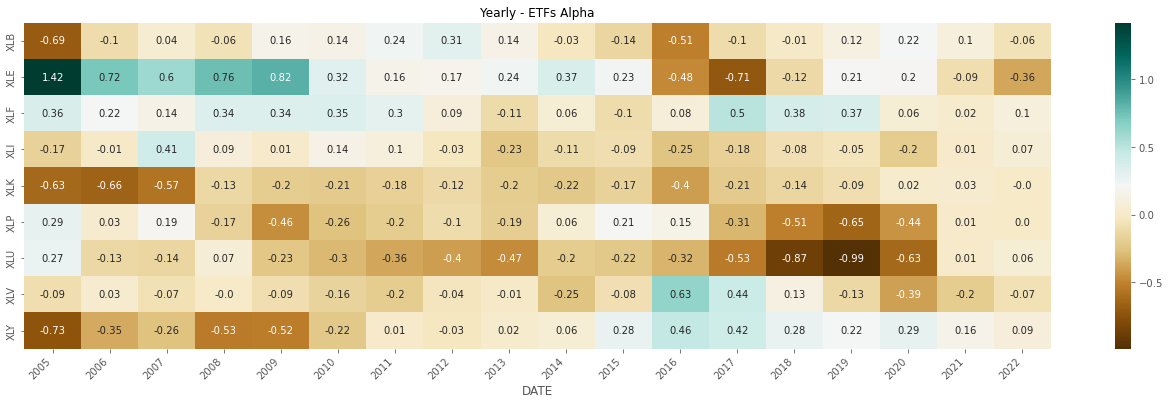

In [39]:
df_all_alpha_year  = df_all_alpha.to_period('Y').groupby('DATE')[df_all_alpha.columns].agg('sum')
df_all_alpha_year = df_all_alpha_year.round(decimals=2)


fig, ax = plt.subplots(figsize=(23,6))
plt.title('Yearly - ETFs Alpha',fontsize=12)
sns.heatmap(df_all_alpha_year.T , annot=True, fmt="", cmap='BrBG')
plt.xticks(rotation=45, ha='right')
plt.show()

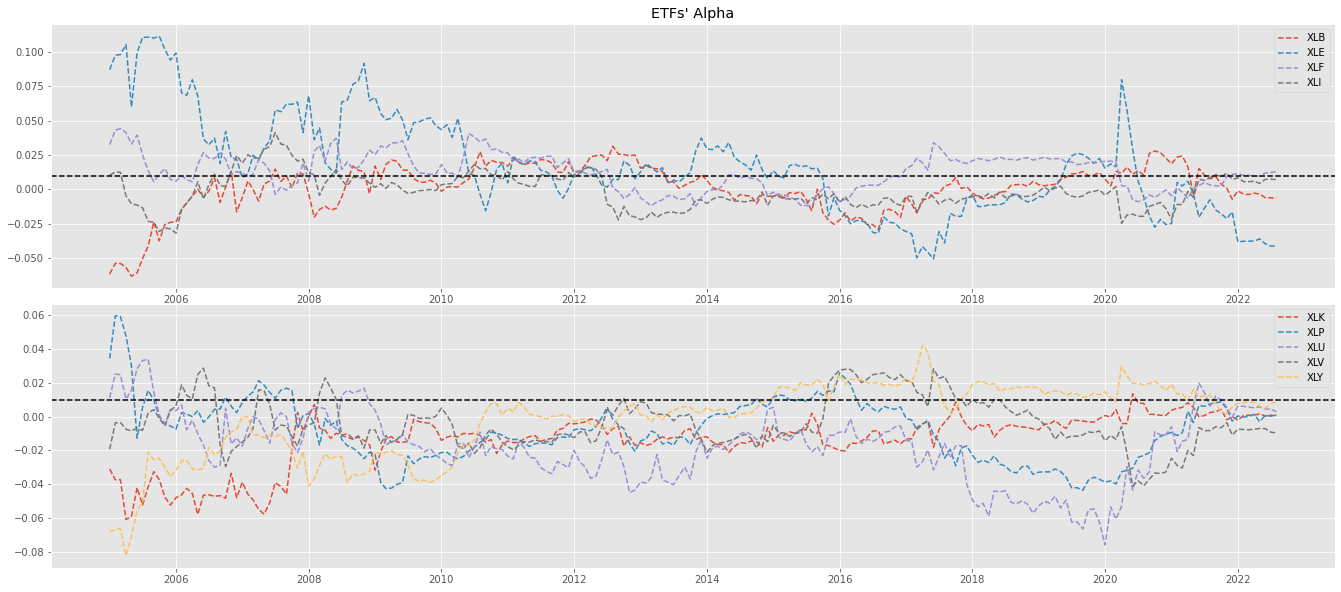

In [31]:
plt.subplots(figsize=(23,10))
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=3,colspan=1)
ax1.set_title("ETFs' Alpha")
for i in range(df_all_alpha.shape[1]-5):
    ax1.plot(df_all_alpha.index , df_all_alpha[df_all_alpha.columns[i]] ,label=str(df_all_alpha.columns[i]),linestyle='--')
ax1.axhline(0.01 , linestyle='--' , color='black')
ax1.legend()

ax2 = plt.subplot2grid((6,1),(3,0),rowspan=3,colspan=1)
for i in range(df_all_alpha.shape[1]-5,df_all_alpha.shape[1]):
    ax2.plot(df_all_alpha.index , df_all_alpha[df_all_alpha.columns[i]] ,label=str(df_all_alpha.columns[i]),linestyle='--')
ax2.axhline(0.01 , linestyle='--' , color='black')
ax2.legend()
plt.show()